In [182]:
! ls Data

1519759656_39328483.csv
2017 PMP Data Final No Duplicates.xlsx
District_Province_Population
Federal_VDC_Relation_web.xlsx
nepal_population_household_ward-2011.csv
NM_2016_17clean.csv
NM_2016_17export.csv


In [183]:
#Import Main Data Frame
import pandas as pd
import numpy as np

cleanpath='Data/NM_2016_17clean.csv'
df = pd.read_csv(cleanpath)

df.head()

,INCIDENT NUMBER,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,HLCIT CODE,LOCATION ACCURACY,...,Female Abducted,Youth -25 years or below- abducted,Total Buildings,Severe Building Damage,Total Vehicles,Severe Vehicle Damage,Election-related specific cause primary,Election-related specific cause secondary,Verification Feedback,VERIFIED
0,17685,Newspaper: Bank section of transportation mana...,2017-12-30,"Janakpur, Dhanusa, JANAKPUR, Central Developme...","Alert: Dhanusha/Dec 30, Yatayat byawastha kary...","News Media, Incident, Announcements / Demands,...",26.730245,85.927913,524 2 04 17 3 001,Municipality/VDC,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0
1,17684,Janakpur Express: Madhesh movement victims pro...,2017-12-30,"Janakpur, Dhanusa, JANAKPUR, Central Developme...","Alert: Dhanusha/Dec 30, Tesro madhesh andolan ...","LOCAL COMMUNITIES, Protest / Demonstration, Ne...",26.727996,85.927458,524 2 04 17 3 001,Municipality/VDC,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0
2,17675,Janakpur Express: Nawarang hotel vandalized | ...,2017-12-27,"Janakpur, Dhanusa, JANAKPUR, Central Developme...","Alert: Dhanusha/Dec 27, Janakpur ko shiva chow...","Nepal Police (responding), News Media, Vandali...",26.735339,85.936133,524 2 04 17 3 001,Municipality/VDC,...,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0
3,17670,Janakpur Today: Students padlocked technical s...,2017-12-23,"Dhanusadham, Dhanusa, JANAKPUR, Central Develo...","Alert: Dhanusha/Dec 23, Niyamit pathanpathan k...","News Media, District Education Office / MoE, I...",26.819670,86.055004,524 2 04 17 5 050,Municipality/VDC,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0
4,17668,Janakpur Today: Students protest in front of D...,2017-12-22,"Rajbiraj, Saptari, SAGARMATHA, Eastern Develop...","Alert: Saptari/Dec 22, Little angels boarding ...","Nepal Police (responding), Protest / Demonstra...",26.501006,86.772946,524 1 03 15 5 033,Municipality/VDC,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0


In [184]:
df.columns

Index(['INCIDENT NUMBER', 'INCIDENT TITLE', 'INCIDENT DATE', 'LOCATION',
       'DESCRIPTION', 'CATEGORY', 'LATITUDE', 'LONGITUDE', 'HLCIT CODE',
       'LOCATION ACCURACY', 'Development Region', 'Zone', 'District',
       'Municipality/VDC', 'Ward', 'District(New)', 'Municipality/VDC(New)',
       'Ward(New)', 'SOURCE', 'SOURCE TYPE',
       'Peace Monitoring - General Information',
       'Event Date - Peace Monitoring',
       'Duration - only applicable to non-violent forms', 'Number of Injuries',
       'Violent vs non-violent', 'One-sided vs two-sided', 'Number of Deaths',
       'Collective vs interpersonal', 'Forms and Causes',
       'Event form - primary', 'Event form - secondary', 'Weapon', 'Weapon 2',
       'Cause - primary', 'Cause - secondary', 'Crosscutting issues',
       'Actor 1 - Perpetrator', 'Actor 1 - Number of People',
       'Actor 1 - Perpetrator Type', 'Actor 1 Entity Name',
       'Actor 1 - Youth -25 years or below- involvement',
       'Actor 2 - Perpetrat

In [185]:
df['INCIDENT DATE'] = pd.to_datetime(df['INCIDENT DATE'])

In [186]:
#df = df.set_index(['INCIDENT NUMBER'])

## Create a dataframe for plotting impacts

In [187]:
#Drop out irrelivant frames
impactsdroplist = ['Peace Monitoring - General Information','INCIDENT TITLE', 'LOCATION', 'INCIDENT NUMBER', 
       'DESCRIPTION',  'Development Region', 'Zone','SOURCE', 'SOURCE TYPE',
       'Municipality/VDC', 'Ward', 'District(New)', 'Municipality/VDC(New)',
       'Ward(New)',
       'Event Date - Peace Monitoring','LATITUDE', 'LONGITUDE','CATEGORY',
       'Duration - only applicable to non-violent forms', 'Number of Injuries',
       'Violent vs non-violent', 'One-sided vs two-sided', 'Number of Deaths',
       'Collective vs interpersonal', 'Forms and Causes',
       'Event form - primary', 'Event form - secondary', 'Weapon', 'Weapon 2',
       'Cause - primary', 'Cause - secondary', 'Crosscutting issues',
       'Actor 1 - Perpetrator', 'Actor 1 - Number of People',
       'Actor 1 - Perpetrator Type', 'Actor 1 Entity Name',
       'Actor 1 - Youth -25 years or below- involvement',
       'Actor 2 - Perpetrator 2 or Target', 'Actor 2 Numbers',
       'Target - if one-sided violence',
       'Perpetrator 2 - if two-sided violence', 'Actor 2 entity name',
       'Actor 2 - Youth -25 years or below- involvement', 'Impacts','Election-related specific cause secondary', 'Verification Feedback',
       'VERIFIED']
impactsdf = df.drop(impactsdroplist,axis=1)

#We will only sort by district, so incidents with a lower location acurracy should be dropped.
ss = 'LOCATION ACCURACY'
#imask = ss[(ss == 'Zone') or (ss == 'Country') or (ss == 'Development Region')]
impactsdf = impactsdf[impactsdf[ss] != 'Zone']
impactsdf = impactsdf[impactsdf[ss] != 'Country']
impactsdf = impactsdf[impactsdf[ss] != 'Development Region']

impactsdf.head()

,INCIDENT DATE,HLCIT CODE,LOCATION ACCURACY,District,Total Killed,Female Killed,Youth -25 years or below- killed,Total Injured,Female Injured,Youth -25 years or below- injured,...,Female no. Rape or Attempted Rape,Rape or Attempted Rape - Youth - 25 years or below,Total Abducted,Female Abducted,Youth -25 years or below- abducted,Total Buildings,Severe Building Damage,Total Vehicles,Severe Vehicle Damage,Election-related specific cause primary
0,2017-12-30,524 2 04 17 3 001,Municipality/VDC,Dhanusa,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,2017-12-30,524 2 04 17 3 001,Municipality/VDC,Dhanusa,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,2017-12-27,524 2 04 17 3 001,Municipality/VDC,Dhanusa,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
3,2017-12-23,524 2 04 17 5 050,Municipality/VDC,Dhanusa,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,2017-12-22,524 1 03 15 5 033,Municipality/VDC,Saptari,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [188]:
impactsdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7072 entries, 0 to 7203
Data columns (total 21 columns):
INCIDENT DATE                                         7072 non-null datetime64[ns]
HLCIT CODE                                            7072 non-null object
LOCATION ACCURACY                                     7072 non-null object
District                                              7069 non-null object
Total Killed                                          4748 non-null float64
Female Killed                                         4747 non-null float64
Youth -25 years or below- killed                      4744 non-null float64
Total Injured                                         4747 non-null float64
Female Injured                                        4742 non-null float64
Youth -25 years or below- injured                     4719 non-null object
Total no. of Rape or Attempted Rape                   4748 non-null float64
Female no. Rape or Attempted Rape                     

In [189]:
#group and sum up df
imdist = impactsdf.groupby(['District']).sum()

imdate = impactsdf.groupby('INCIDENT DATE').sum()

#drop out values where these stats were not being recorded
imdate.dropna(axis=0,inplace=True)

imdate = imdate.sort_index()

#stats were not logged until midway through 2016. Let's just remove 2016

imdate = imdate['2017']

imdate.head()


,Total Killed,Female Killed,Youth -25 years or below- killed,Total Injured,Female Injured,Total no. of Rape or Attempted Rape,Female no. Rape or Attempted Rape,Rape or Attempted Rape - Youth - 25 years or below,Total Abducted,Female Abducted,Youth -25 years or below- abducted,Total Buildings,Severe Building Damage,Total Vehicles,Severe Vehicle Damage
INCIDENT DATE,,,,,,,,,,,,,,,
2017-01-01,5.0,4.0,2.0,0.0,0.0,2.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2017-01-02,1.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2017-01-03,1.0,1.0,1.0,6.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-04,2.0,1.0,0.0,2.0,0.0,4.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-05,0.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Initial Exploration

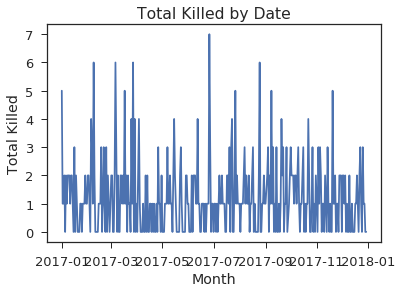

In [190]:
#try and plot something...  May be useful to agrigate by week and seperate into provinces... return to this later
import matplotlib.pyplot as plt

plt.plot('Total Killed', data=imdate)
#plt.figure(figsize=(200,100))
plt.xlabel('Month')
plt.ylabel('Total Killed')
plt.title('Total Killed by Date')
plt.yticks()

plt.show()



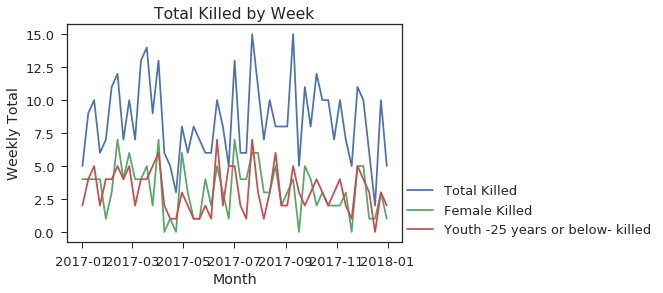

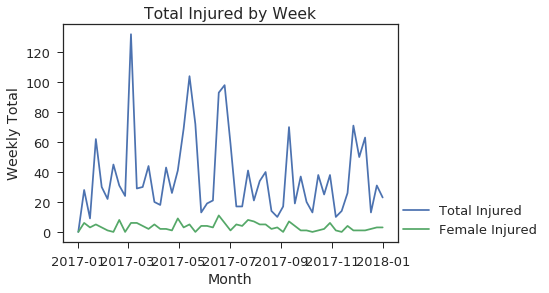

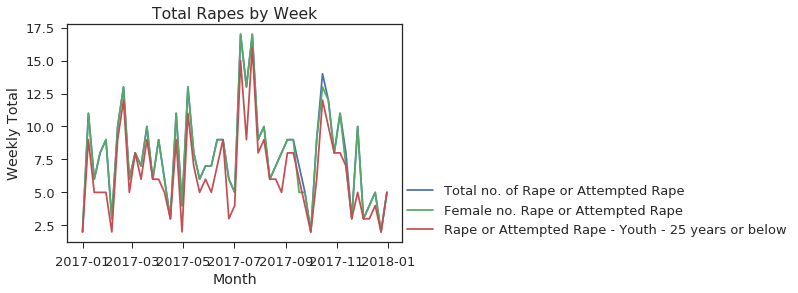

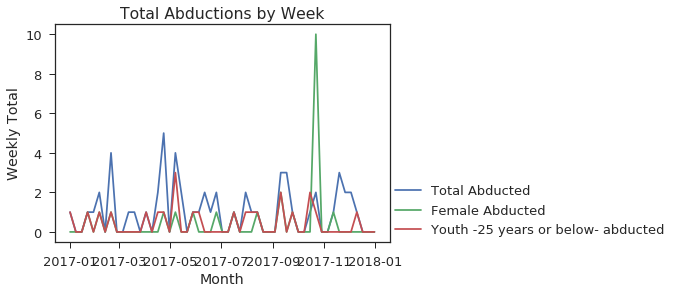

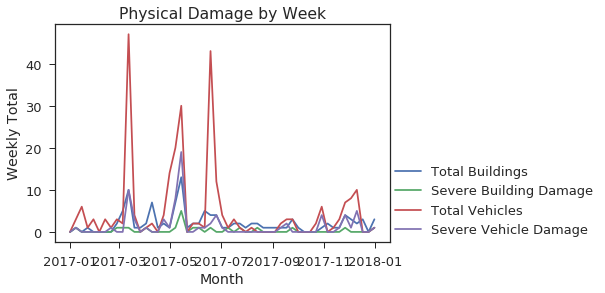

In [191]:
#We can do better than that... Agrigate by week.
imweek = imdate.resample('W').sum()

#plot killed and injured
def plotimpact(Range,title):
    for impact in Range:
        plt.plot(impact, data=imweek)
    plt.xlabel('Month')
    plt.ylabel('Weekly Total')
    plt.title(title)
    plt.yticks()
    plt.legend(loc=(1,0))
    plt.show()

imps = imweek.columns    
plotimpact(imps[:3],'Total Killed by Week')
plotimpact(imps[3:5],'Total Injured by Week')
plotimpact(imps[5:8],'Total Rapes by Week')
plotimpact(imps[8:11],'Total Abductions by Week')
plotimpact(imps[11:],'Physical Damage by Week')

In [192]:
#Lets try with districts and population 
imdist = impactsdf.groupby(['District']).sum()
imdist.head()

,Total Killed,Female Killed,Youth -25 years or below- killed,Total Injured,Female Injured,Total no. of Rape or Attempted Rape,Female no. Rape or Attempted Rape,Rape or Attempted Rape - Youth - 25 years or below,Total Abducted,Female Abducted,Youth -25 years or below- abducted,Total Buildings,Severe Building Damage,Total Vehicles,Severe Vehicle Damage
District,,,,,,,,,,,,,,,
Achham,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arghakhanchi,7.0,3.0,1.0,10.0,6.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Baglung,6.0,2.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Baitadi,4.0,4.0,2.0,10.0,3.0,4.0,4.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0
Bajhang,4.0,2.0,1.0,61.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [193]:
#Import the data frame
pop_pd = pd.read_csv('Data/District_Province_Population')
pop_pd = pop_pd.set_index('District')
pop_pd = pop_pd.sort_index()
pop_pd.head()

,Province,Population
District,,
Achham,7,256188.0
Arghakhanchi,5,196896.0
Baglung,4,260107.0
Baitadi,7,250225.0
Bajhang,7,194701.0


In [194]:
#Test if district names are correct - Prints out the districts that don't match. 
for num in range(75):
    test = imdist.index[num] == pop_pd.index[num]
    if test == False:
        print(pop_pd.index[num],imdist.index[num])

In [195]:
#Put the Province in the index and take a look. 
imdist_pop = pop_pd.join(imdist)
#imdist_pop = imdist_pop.sort_by('Province')
#imdist_pop = imdist_pop.set_index(['Province','District'])
imdist_pop.head()

,Province,Population,Total Killed,Female Killed,Youth -25 years or below- killed,Total Injured,Female Injured,Total no. of Rape or Attempted Rape,Female no. Rape or Attempted Rape,Rape or Attempted Rape - Youth - 25 years or below,Total Abducted,Female Abducted,Youth -25 years or below- abducted,Total Buildings,Severe Building Damage,Total Vehicles,Severe Vehicle Damage
District,,,,,,,,,,,,,,,,,
Achham,7,256188.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arghakhanchi,5,196896.0,7.0,3.0,1.0,10.0,6.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Baglung,4,260107.0,6.0,2.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Baitadi,7,250225.0,4.0,4.0,2.0,10.0,3.0,4.0,4.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0
Bajhang,7,194701.0,4.0,2.0,1.0,61.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


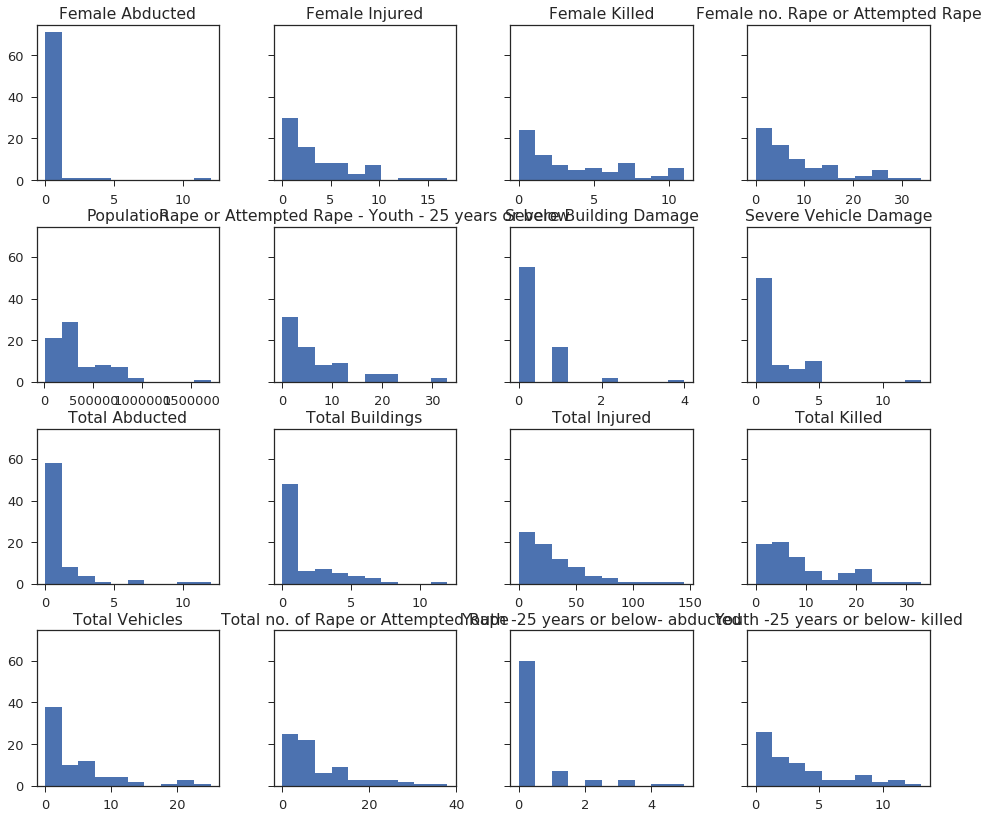

In [196]:
#Let's plot something!
 #drop out province first
imdist_pop_no_prov = imdist_pop.drop('Province', axis=1)
imdist_pop_no_prov.hist(figsize=(16,14), grid=False, sharey=True, sharex=False) 
#plt.figure()
plt.show()

A quick histogram plot of the impacts dataframe shows most impacts falling along a Poisson frequency distribution. In general, There are more districts with lower impact numbers and fewer districts with higher impact numbers. The vertical axis in all histograms is the number of districts which experienced the numbers in the horizontal axis. 

In [197]:
#Plot the same graphs, but normalize by population - this should create nice bell curves, right?
def normalize(df,per):
    df_norm = df
    for district in range(0,df_norm.shape[0]):
        for column in range(1,df_norm.shape[1]):
            impact = df_norm.iloc[district, column]
            pop = df_norm['Population'][district]
            df_norm.iloc[district, column] = impact/(pop/per) # <- should create no. incidents per this no. population. 
    return df_norm

imdist_normalized = normalize(imdist_pop_no_prov, 100000)

imdist_normalized.head()



,Population,Total Killed,Female Killed,Youth -25 years or below- killed,Total Injured,Female Injured,Total no. of Rape or Attempted Rape,Female no. Rape or Attempted Rape,Rape or Attempted Rape - Youth - 25 years or below,Total Abducted,Female Abducted,Youth -25 years or below- abducted,Total Buildings,Severe Building Damage,Total Vehicles,Severe Vehicle Damage
District,,,,,,,,,,,,,,,,
Achham,256188.0,0.000000,0.000000,0.000000,8.977782,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
Arghakhanchi,196896.0,3.555176,1.523647,0.507882,5.078823,3.047294,1.523647,1.523647,1.523647,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
Baglung,260107.0,2.306743,0.768914,0.384457,0.768914,0.000000,0.384457,0.384457,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.384457,0.000000
Baitadi,250225.0,1.598561,1.598561,0.799281,3.996403,1.198921,1.598561,1.598561,0.799281,0.0,0.0,0.0,0.799281,0.799281,0.000000,0.000000
Bajhang,194701.0,2.054432,1.027216,0.513608,31.330091,1.540824,0.513608,0.513608,0.513608,0.0,0.0,0.0,0.000000,0.000000,0.513608,0.513608


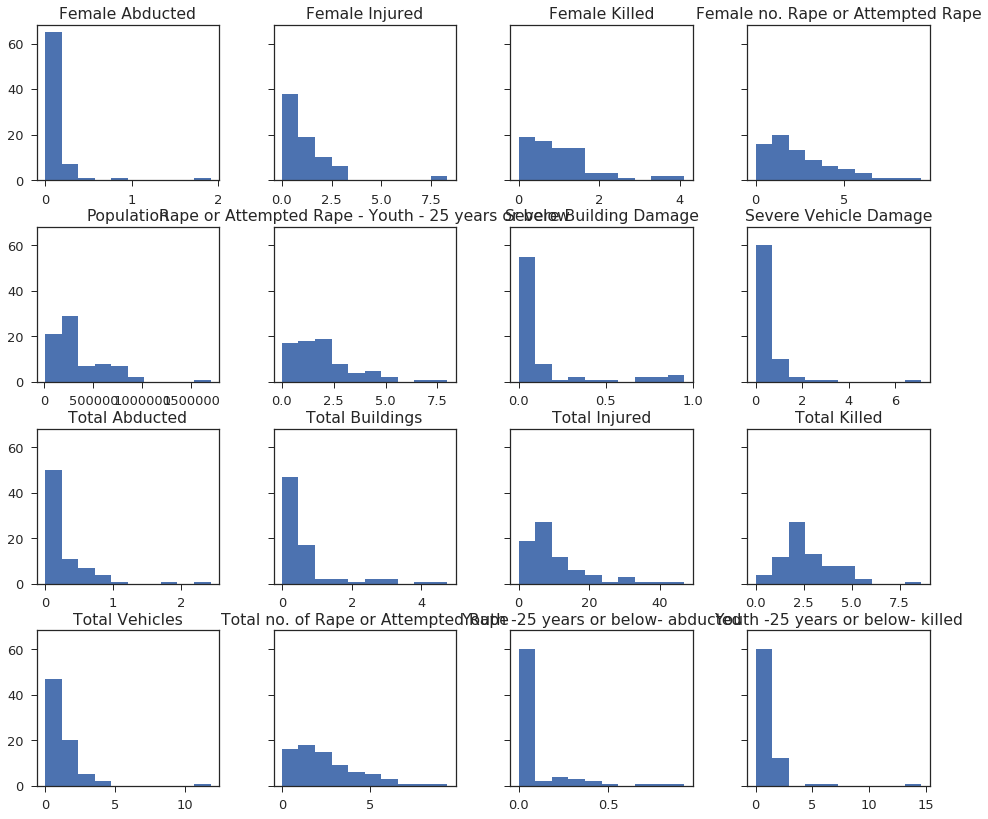

In [198]:
imdist_normalized.hist(figsize=(16,14), grid=False, sharey=True, sharex=False)
plt.show()

The histograms above show the distribution of impacts by district per 100,000 people. Notably, total killed numbers trend toward roughly 2.3 violent deaths per 100,000 people, roughly in line with UNODC Homicide numbers from 2014 https://en.wikipedia.org/wiki/List_of_countries_by_intentional_homicide_rate. Most distributions are skewed to the left, with long tails to the right - pehapse relecting a tendancy for less severe impacts to happen more frequently than severe ones.

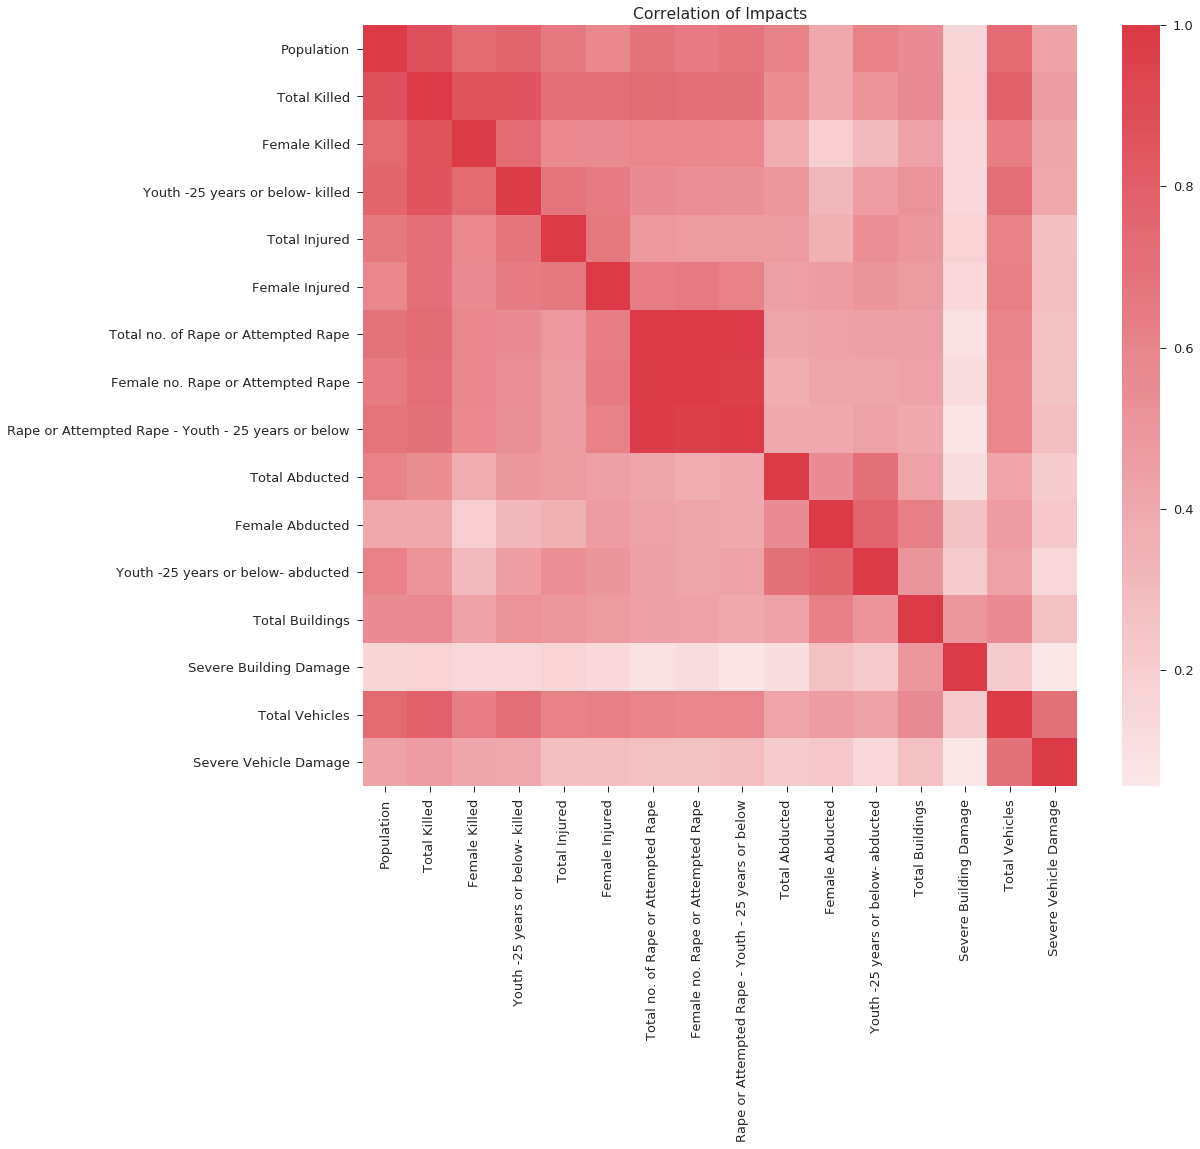

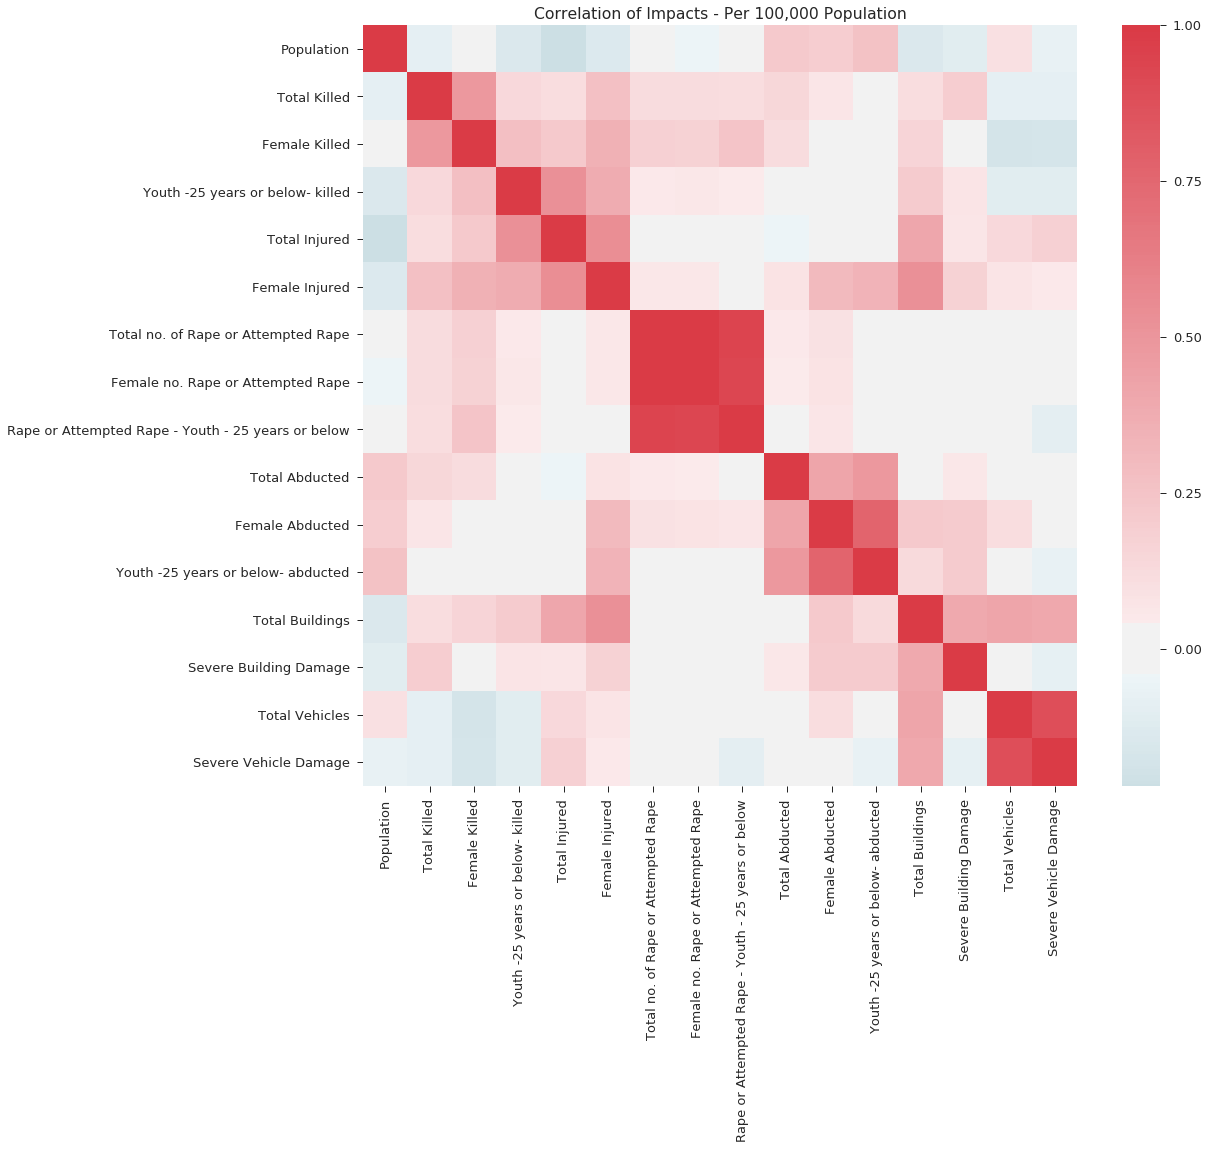

In [208]:
#Try some different seaborn plots to find relationships.  
import seaborn as sns #Do heat map? - probably need to add on more demographic information for the districts to do this well. 

def plotheat(df,title):
    corr = df.corr()

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(16, 14))
    
    #set title
    ax.set_title(title)
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(corr, cmap=cmap, center=0)
    plt.show()

imdist_pop_no_prov = imdist_pop.drop('Province', axis=1)
plotheat(imdist_pop_no_prov,'Correlation of Impacts')
plotheat(imdist_normalized, 'Correlation of Impacts - Per 100,000 Population')

A correlation heatmap of all impacts shows a slight correlation between nearly all impacts, save for severe building damage. This could be a function of these impacts being correlated with population. The highest correlation with population appears to be "Total Killed."

Controlling for population by re-mapping impact numbers per 100,000 people reveals some interesting hot-spots. Some correlations between impacts are obvious, as they reflect overlapping events. For example, "Female Killed" is a subset of "Total Killed" so both should be correlated with each other. The same apples for "Total injured" v. "Female Injured" etc. Total killed numbers, still show slight correlations with most other impacts, even when controlling for population, including injuries, rapes, abductions, and building damage. This may be a result of multiple impacts resulting from the same major events, but perhaps also shows there are some commonalities beyond population numbers which might predict where violence takes place. Incorporating other demographic information could be informative.

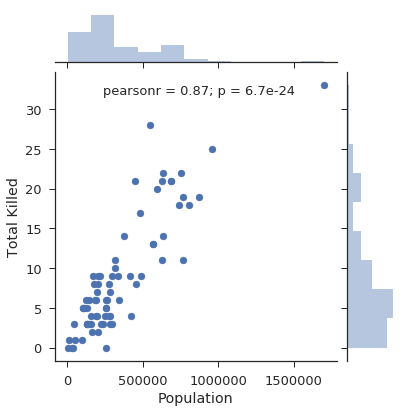

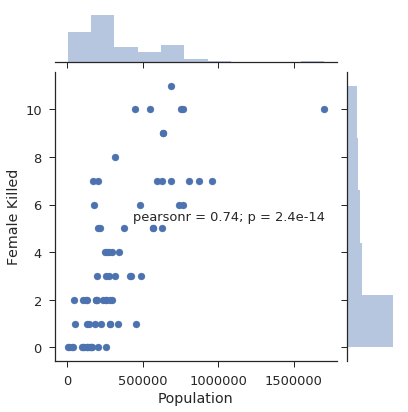

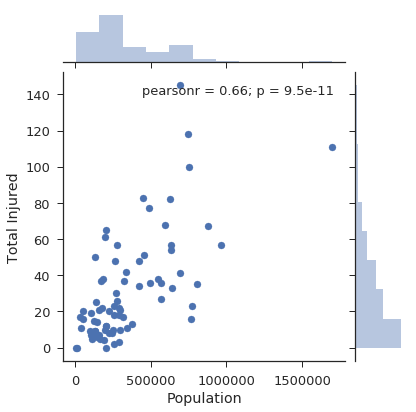

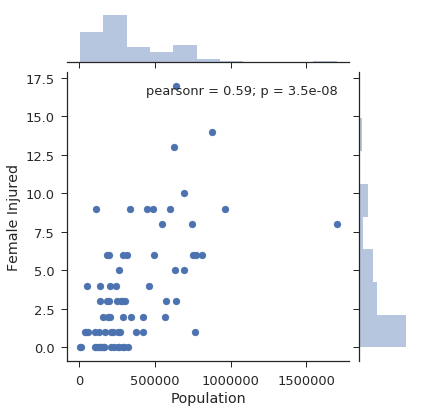

In [200]:
#Let's see if we can find outliers by population. 

#landscape = (8.27, 11.7)
#fig, ax = pyplot.subplots(figsize=landscape)
#plt.subplots(2, 2)
sns.jointplot(x='Population', y='Total Killed', data=imdist_pop)
sns.jointplot(x='Population', y='Female Killed', data=imdist_pop)
sns.jointplot(x='Population', y='Total Injured', data=imdist_pop)
sns.jointplot(x='Population', y='Female Injured', data=imdist_pop)

#sns.xrot=60
#plt.figsize(16,16)
plt.show()

ThThere is an obvious relationship between district population and impact numbers. For the total killed by population, chart for instance, a "pearsonr = 0.87" shows there is a essentially an 87% linear correlation between population and total killed in the graph. In the same graph, "p=6.7e-24" means there is a vanishingly small (6.7 * 10 to the negative 24th) chance that the null hypothesis is correct and that the relationship is a result of random chance.

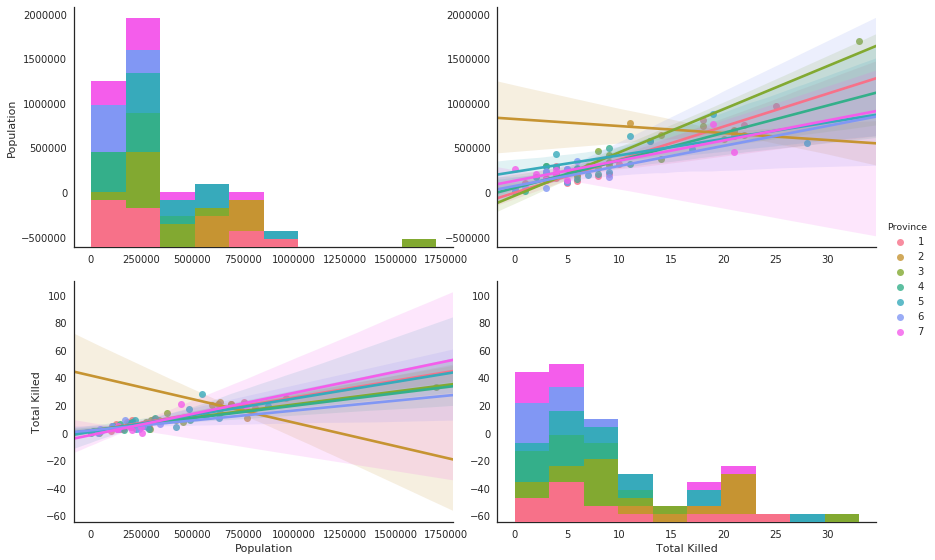

In [201]:
#try pairplot for the df
#malefemaledf = imdist_pop[['Province','Population','Total Killed','Female Killed']]
sns.set(font_scale=1)
sns.set_style("white")
sns.pairplot(imdist_pop, kind='reg', hue='Province', vars=['Population','Total Killed'],size=4, aspect=1.5)
#plt.xticks(rotation=60)
sns.despine()
plt.show()

In the pair plot above, we can see that most provinces more or less display a trend line correlating total killed with population. Province 2, however, shows a displays a prominently different trend line. The reason for this is illuminated in the graph below.

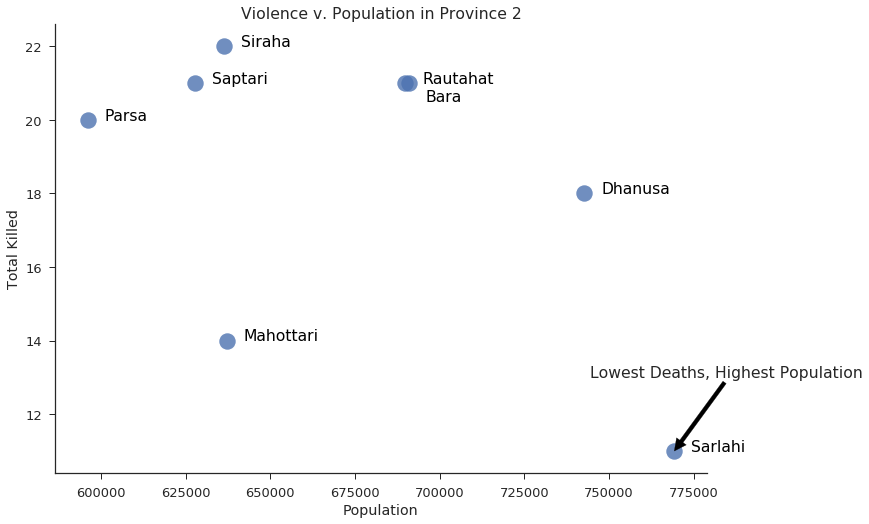

In [202]:
#Province 2 looks like an outlier for total killed in political violence. Let's plot it
im_province2 = imdist_pop.loc[imdist_pop['Province'] == 2].reset_index()
#sns.barplot(y="District", x="Total Killed", data=im_province2, label="Deaths by Political Violence in Provice 2", color="b")
#sns.despine()
#plt.show()
#sns.barplot(y="District", x="Population", data=im_province2, label="Population by District", color="y")
#sns.despine()
#plt.show()
sns.set(font_scale=1.3)
#sns.set_style("white")
sns.set_style('ticks')
fig, ax = plt.subplots()
ax.set_title("Violence v. Population in Province 2")
fig.set_size_inches(11.69, 8.25)
p1 = sns.regplot(x="Population", y="Total Killed", data=im_province2, fit_reg=False, scatter_kws={"s": 270})

#label districts
for row in range(0,im_province2.shape[0]):
    ycorrect = 0
    if im_province2.District[row] == 'Bara':
        ycorrect = 0.5
    p1.text(im_province2.Population[row]+5000, im_province2['Total Killed'][row]-ycorrect, im_province2.District[row], horizontalalignment='left', size='medium', color='black')

sns.despine()#take off the top borders

#annotate with arrow
yloc=im_province2['Total Killed'].loc[im_province2.District == 'Sarlahi']
xloc=im_province2['Population'].loc[im_province2.District == 'Sarlahi']
plt.annotate('Lowest Deaths, Highest Population', xy=(xloc,yloc), xytext=(xloc-25000,yloc+2) ,arrowprops=dict(facecolor='black'))
plt.show()

Sarlahi has seen the lowest total killed in 2017 while possessing the highest population. Whether Province 2 bucking the trend is the result of unusually low deaths in Sarlahi, or unusually high deaths in the others remains to be explored.

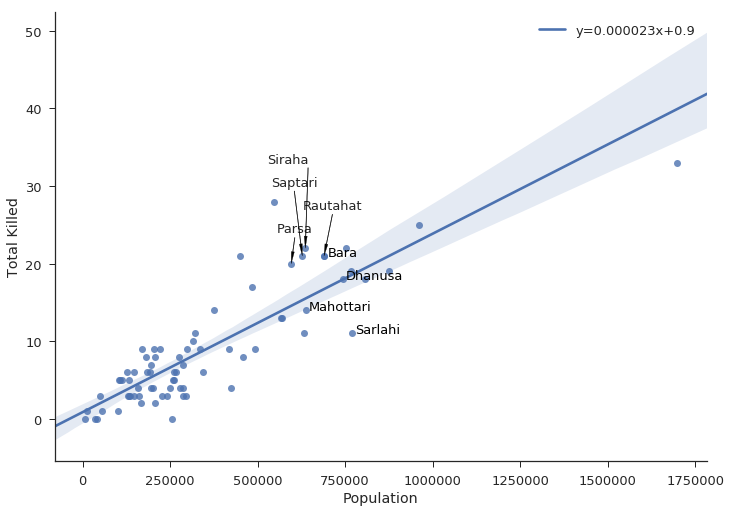

In [203]:
from scipy import stats

#Plot population v totals deaths regression line and devation of province 2 districts from trend. 
fig, ax = plt.subplots()
fig.set_size_inches(11.69, 8.25)

# get coeffs of linear fit for legend. 
slope, intercept, r_value, p_value, std_err = stats.linregress(imdist_pop['Population'], imdist_pop['Total Killed'])

p3 = sns.regplot(x='Population', y='Total Killed', data=imdist_pop, line_kws={'label':"y={0:.6f}x+{1:.1f}".format(slope,intercept)})

#check for overlap of annotations
def checkoverlap(xpos,ypos,poslist):
    #count = 0
    #print(poslist)
    for x, y in poslist:
        #print(x,y)
        if (abs(xpos - x) < 200000) and (abs(ypos - y) < 3):
            return True
    return False

#label districts
poslist = [tuple([1,1])]
for row in range(0,imdist_pop.shape[0]):
    if imdist_pop.Province[row] == 2:
        xpos = imdist_pop.Population[row]
        ypos = imdist_pop['Total Killed'][row]
        text = imdist_pop.index[row]
        if checkoverlap(xpos,ypos,poslist) == True:
            xloc = xpos 
            yloc = ypos
            while checkoverlap(xloc,yloc,poslist) == True:
                yloc = yloc + .5
                xloc = xloc - 5000
                
            poslist.append(tuple([xloc,yloc]))
            plt.annotate(text, xy=(xpos,ypos), xytext=(xloc,yloc), arrowprops=dict(facecolor='black', width=0.5, headwidth=3), size='small')
        
        else:
            p3.text(xpos+10000, ypos, text, horizontalalignment='left', size='small', color='black')
        #print(xpos,ypos)
        poslist.append(tuple([xpos,ypos]))

sns.despine()#take off the top borders

# plot legend
ax.legend()

#show it
plt.show()

We can see the reason for Province 2 bucking the trend is two fold: Sarlahi has far fewer violent deaths per-capita than the linear regression line (2.3 deaths per 100,000 people), while Parsa, Saptari, Siraha, and Rautahat have considerably more.

In [204]:
imdist_pop.head()

,Province,Population,Total Killed,Female Killed,Youth -25 years or below- killed,Total Injured,Female Injured,Total no. of Rape or Attempted Rape,Female no. Rape or Attempted Rape,Rape or Attempted Rape - Youth - 25 years or below,Total Abducted,Female Abducted,Youth -25 years or below- abducted,Total Buildings,Severe Building Damage,Total Vehicles,Severe Vehicle Damage
District,,,,,,,,,,,,,,,,,
Achham,7,256188.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arghakhanchi,5,196896.0,7.0,3.0,1.0,10.0,6.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Baglung,4,260107.0,6.0,2.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Baitadi,7,250225.0,4.0,4.0,2.0,10.0,3.0,4.0,4.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0
Bajhang,7,194701.0,4.0,2.0,1.0,61.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


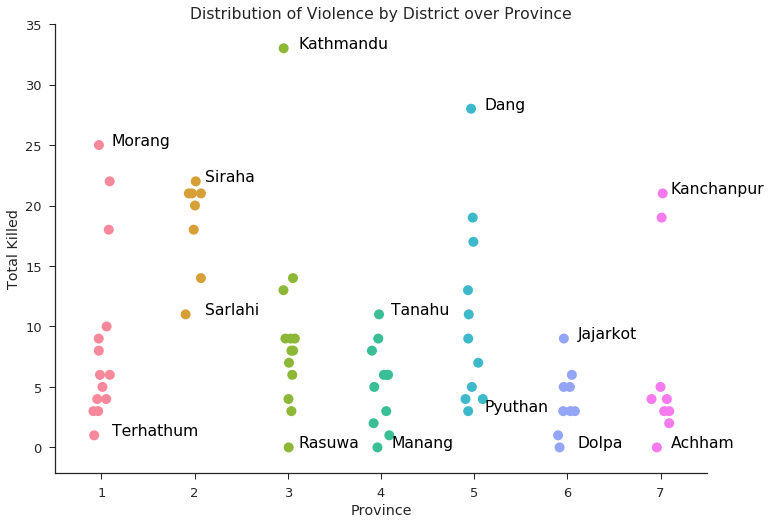

In [205]:
#Don't forget the jitter plots, you can do that districtwise, 
fig, ax = plt.subplots()
ax.set_title("Distribution of Violence by District over Province")
fig.set_size_inches(11.69, 8.25)
p1 = sns.stripplot(x='Province', y='Total Killed', data=imdist_pop, size=10, jitter=True)

#Annotate max for province
for p in range(1,8):
    im_prov = imdist_pop.loc[imdist_pop['Province'] == p]
    xpos = p-0.89
    ypos = max(im_prov['Total Killed'])
    text = im_prov.loc[im_prov['Total Killed'] == ypos].index[0]
    p1.text(xpos, ypos, text, horizontalalignment='left', size='medium', color='black')
    ypos = min(im_prov['Total Killed'])
    text = im_prov.loc[im_prov['Total Killed'] == ypos].index[0]
    p1.text(xpos, ypos, text, horizontalalignment='left', size='medium', color='black')

#sns.violinplot(x='Province', y='Total Killed', data=imdist_pop, size=10)

sns.despine()
plt.show()

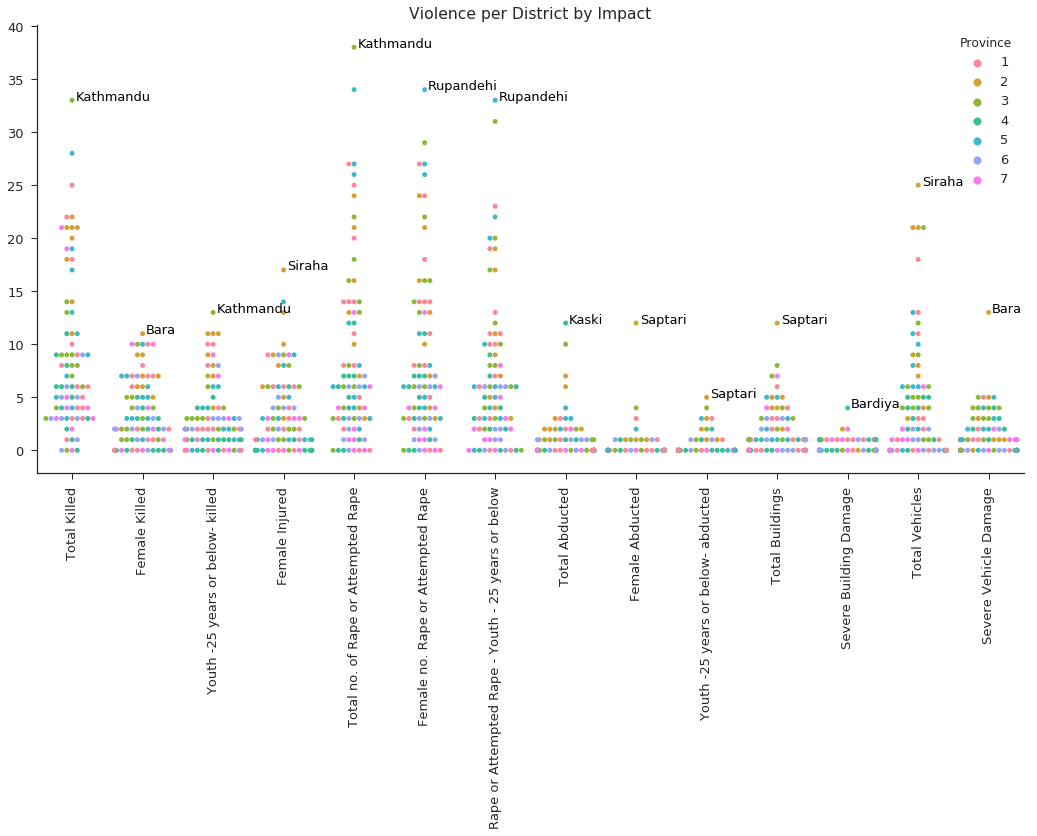

In [206]:
imdist_province = imdist_pop.drop(['Population','Total Injured'],axis=1)
annot = imdist_province.drop('Province',axis=1)
imdist_province['District']=imdist_province.index
imelt = imdist_province.melt(id_vars=['District','Province'])
imelt = imelt.set_index('District')
fig, ax = plt.subplots()
#current_palette = sns.hls_palette(8, l=.3, s=.8)
#sns.palplot(current_palette)
ax.set_title("Violence per District by Impact")
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
fig.set_size_inches(17.69, 8.25)
p2 = sns.swarmplot(data=imelt,x='variable', y='value', hue='Province')#, palette=current_palette)
#g = sns.factorplot(hue="Province", data=imdist_province, kind="swarm", size=4, aspect=.7);

#Annotate!
#locs, labels = plt.xticks()
count = 0
for impact in annot.columns.tolist():
    im_prov = annot[impact]
    xpos = count + 0.05
    ypos = max(im_prov)
    text = im_prov.loc[im_prov == ypos].index[0]
    p2.text(xpos, ypos, text, horizontalalignment='left', size='small', color='black')
    count += 1

sns.despine()
plt.xticks(rotation=90)
plt.show()
